#Analyzing U.S. COVID-19 Data

---



---



##Imports:

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

##Loading the data:

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data1_path = '/content/drive/Shareddrives/Pinkode/data.csv'
df1 = pd.read_csv(data1_path)
data2_path = '/content/drive/Shareddrives/Pinkode/pulse_puf_most_recent.csv'
df2 = pd.read_csv(data2_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-49f0b8ab0a51>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(data1_path)


In [ ]:
# Removing duplicates
df_part1 = df1.drop_duplicates()

In [ ]:
# Removing duplicates
df2_part1 = df2.drop_duplicates()

In [ ]:
print(df2_part1.columns)

In [ ]:
# Drop columns
columns_to_drop_part1 = ['state_fips_code', 'res_county', 'county_fips_code', 'ethnicity',
                   'case_positive_specimen_interval', 'case_onset_interval', 'process', 'exposure_yn',
                   'current_status']
df_part1 = df_part1.drop(columns=columns_to_drop_part1)

NameError: name 'df_part1' is not defined

In [ ]:
df_part1.info()

Note:

The number of entries decreases from "19020962 entries" to "841485 entries"
When i removed the duplications

General flow:-
- Loading the very large data
- cleaning the data
- Starting with some analysis, Relations, Comparing to deap understand our data
- Hypothese testing
- Regression
- Bonus task
- Conclussion

##PART 1: Exploratory Analysis:

---



**Use the appropriate statistics and plots to investigate the following:**

###1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp

In [ ]:
part1_1 = df_part1[[ 'case_month', 'hosp_yn', 'death_yn']].copy()

part1_1['hosp_yn'] = part1_1['hosp_yn'].replace({'Missing': 0, 'Unknown': 0})
part1_1['death_yn'] = part1_1['death_yn'].replace({'Missing': 0, 'Unknown': 0})

part1_1['hosp_yn'] = part1_1['hosp_yn'].replace({'No': 0, 'Yes': 1})
part1_1['death_yn'] = part1_1['death_yn'].replace({'No': 0, 'Yes': 1})

grouped_hosp_yn = part1_1.groupby(['case_month'])['hosp_yn'].sum().reset_index()
grouped_death_yn = part1_1.groupby(['case_month'])['death_yn'].sum().reset_index()

# Create a line plot of the total number of hospitalizations and deaths by month-year
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(grouped_hosp_yn['case_month'], grouped_hosp_yn['hosp_yn'], label='Hospitalizations')
ax.plot(grouped_death_yn['case_month'], grouped_death_yn['death_yn'], label='Deaths', color='red')
ax.set_xlabel('case_month')
ax.set_ylabel('Total Number')
plt.xticks(rotation=45)
ax.set_title('Total Hospitalizations vs Deaths by Month-Year')
ax.legend()

Technical documentation:

Description:
the relation between the death and hosp and group ages
Usage:
show how the age affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of age for both death and hosp
Challenges:
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 2. The average rates of COVID-related deaths relative to patient demographics


In [ ]:
print(part1_2["sex"].unique())
print(part1_2["age_group"].unique())
print(part1_2["race"].unique())
print(part1_2["death_yn"].unique())

In [ ]:
# Create a subset of the data with relevant columns
part1_2 = df_part1[['sex', 'age_group', 'race', 'death_yn']].copy()
part1_2 = part1_2.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_2 = part1_2.dropna()

# Ensure 'death_yn' is numeric
part1_2['death_yn'] = part1_2['death_yn'].astype(int)

# Group by age group, sex, and race, and calculate the mean death rate
grouped_third = part1_2.groupby(['age_group', 'sex', 'race']).mean()['death_yn'].reset_index()

# Sort values for better visualization
grouped_third = grouped_third.sort_values(by='death_yn', ascending=False)


############################################################################################

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Create a bar plot with age group, sex, and race
sns.catplot(
    x='age_group',
    y='death_yn',
    hue='sex',
    col='race',
    data=grouped_third,
    kind='bar',
    height=5,
    aspect=1.2,
    palette={'Male': 'steelblue', 'Female': 'pink'}
)

# Adjust the plot
plt.subplots_adjust(top=0.9)
plt.suptitle('COVID-19 Death Rate by Demographics')
plt.show()


Technical documentation:

Description:
the relation between the groupage race sex death
Usage:
show how the demographics affect death rates
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of age for all demographics
Challenges:
plot all of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 3. The rates of COVID-related hospitalization and death with age (across age groups).

In [ ]:
part1_3 = df_part1[[ 'age_group', 'hosp_yn', 'death_yn']].copy()

part1_3 = part1_3.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_3 = part1_3.dropna()

grouped_hosp_yn = part1_3.groupby(['age_group'])['hosp_yn'].sum().reset_index()
grouped_death_yn = part1_3.groupby(['age_group'])['death_yn'].sum().reset_index()

# Create a line plot of the total number of hospitalizations and deaths by month-year
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(grouped_hosp_yn['age_group'], grouped_hosp_yn['hosp_yn'], label='Hospitalizations')
ax.plot(grouped_death_yn['age_group'], grouped_death_yn['death_yn'], label='Deaths', color='red')
ax.set_xlabel('age_group')
ax.set_ylabel('Total Number')
plt.xticks(rotation=45)
ax.set_title('Total Hospitalizations vs Deaths by age group')
ax.legend()

In [ ]:
part1_3 = df_part1[[ 'age_group', 'hosp_yn', 'death_yn']].copy()

part1_3 = part1_3.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_3 = part1_3.dropna()

grouped_hosp_yn = part1_3.groupby(['age_group'])['hosp_yn'].sum().reset_index()
grouped_death_yn = part1_3.groupby(['age_group'])['death_yn'].sum().reset_index()

# Create a bar chart of the total number of hospitalizations and deaths by age group
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(grouped_hosp_yn['age_group'], grouped_hosp_yn['hosp_yn'], label='Hospitalizations', color='darkseagreen')
ax.bar(grouped_death_yn['age_group'], grouped_death_yn['death_yn'], label='Deaths', color='crimson')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Number')
ax.set_title('Total Hospitalizations vs Deaths by Age Group')
ax.legend()
plt.xticks(rotation=45)
plt.show()

Technical documentation:

Description:
the relation between the death and hosp and group ages
Usage:
show how the age affect both of them
Collection:italicized text
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of age for both death and hosp
Challenges:
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 4. Average rate of COVID-related hospitalization and death per state over the entire study period.

In [ ]:
part1_4 = df_part1[[ 'res_state', 'hosp_yn', 'death_yn']].copy()

part1_4 = part1_4.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_4 = part1_4.dropna()

grouped_hosp_yn = part1_4.groupby(['res_state'])['hosp_yn'].sum().reset_index()
grouped_death_yn = part1_4.groupby(['res_state'])['death_yn'].sum().reset_index()

# Create a line plot of the total number of hospitalizations and deaths by month-year
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(grouped_hosp_yn['res_state'], grouped_hosp_yn['hosp_yn'], label='Hospitalizations')
ax.plot(grouped_death_yn['res_state'], grouped_death_yn['death_yn'], label='Deaths', color='red')
ax.set_xlabel('res_state')
ax.set_ylabel('Total Number')
plt.xticks(rotation=45)
ax.set_title('Total Hospitalizations vs Deaths by res_state')
ax.legend()

In [ ]:
part1_4 = df_part1[[ 'res_state', 'hosp_yn', 'death_yn']].copy()

part1_4 = part1_4.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_4 = part1_4.dropna()

grouped_hosp_yn = part1_4.groupby(['res_state'])['hosp_yn'].sum().reset_index()
grouped_death_yn = part1_4.groupby(['res_state'])['death_yn'].sum().reset_index()

# Create a bar chart of the total number of hospitalizations and deaths by age group
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(grouped_hosp_yn['res_state'], grouped_hosp_yn['hosp_yn'], label='Hospitalizations', color='darkseagreen')
ax.bar(grouped_death_yn['res_state'], grouped_death_yn['death_yn'], label='Deaths', color='crimson')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Number')
ax.set_title('Total Hospitalizations vs Deaths by Age Group')
ax.legend()
plt.xticks(rotation=45)
plt.show()

Technical documentation:

Description:
the relation between the death and hosp and race
Usage:
show how the race affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of race for both death and hosp
Challenges:
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

###5. The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

In [ ]:
# Assuming df_part1 is your DataFrame and 'age_group' is the age_group column
part1_5 = df_part1[['age_group', 'underlying_conditions_yn', 'icu_yn']].copy()

part1_5 = part1_5.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_5 = part1_5.dropna()

grouped_underlying_conditions_yn = part1_5.groupby(['age_group'])['underlying_conditions_yn'].sum().reset_index()
grouped_icu_yn = part1_5.groupby(['age_group'])['icu_yn'].sum().reset_index()

# Set the width of each bar
bar_width = 0.35

# Define the x-axis positions for the bars
x = np.arange(len(grouped_underlying_conditions_yn))

# Create a bar chart of the total number of underlying_conditions_yn and icu_yn by age_group category
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x - bar_width/2, grouped_underlying_conditions_yn['underlying_conditions_yn'], bar_width, label='underlying_conditions_yn', color='forestgreen')
ax.bar(x + bar_width/2, grouped_icu_yn['icu_yn'], bar_width, label='icu_yn', color='coral')

# Set the x-axis labels to be the age_group categories
ax.set_xticks(x)
ax.set_xticklabels(grouped_underlying_conditions_yn['age_group'], rotation=45)

ax.set_xlabel('age_group Group')
ax.set_ylabel('Total Number')
ax.set_title('Total A vs B by age_group Group')
ax.legend()
plt.show()

Technical documentation:

Description:
the relation between the condition and isu and group ages
Usage:
show how the age affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of age for both conditions and icu
Challenges:
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 6. The rate of expected employment loss due to COVID-19 and sector of employment.

In [ ]:
df_part1_puf =df2.drop_duplicates()

In [ ]:
# Assuming df_part1 is your DataFrame and 'kindwork' is the kindwork column
part1_6 = df_part1_puf[['kindwork', 'expctloss']].copy()

part1_6['kindwork'] = part1_6['kindwork'].replace({1: 'Government', 2: 'Private company', 3: 'Non-profit organization', 4: 'Self-employed', 5: 'Working in a family business', -88: None, -99: None})
part1_6['expctloss'] = part1_6['expctloss'].replace({1: 'Yes', 2: 'No', -88: None, -99: None})
part1_6 = part1_6.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_6 = part1_6.dropna()

grouped_expctloss = part1_6.groupby(['kindwork'])['expctloss'].value_counts(normalize=True).unstack().fillna(0)

#Rearrange
grouped_expctloss = grouped_expctloss.sort_values(by=grouped_expctloss.columns[0], ascending=False)

import matplotlib.pyplot as plt

# Set the x-axis positions for the bars
x = np.arange(len(grouped_expctloss))

# Set the width of each bar
bar_width = 0.35

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, grouped_expctloss[1], bar_width, label='yes')
#ax.bar(x + bar_width, grouped_expctloss[0], bar_width, label='2')

# Set the x-axis labels to be the kindwork categories
#ax.set_xticks(x + bar_width/2)
ax.set_xticks(x)
ax.set_xticklabels(grouped_expctloss.index, rotation=45)

ax.set_xlabel('kindwork')
ax.set_ylabel('expctloss')
ax.set_title('expctloss by kindwork')
ax.legend(title='expctloss')

plt.tight_layout()
plt.show()

Technical documentation:

Description:
the relation between the kindwork and expctloss
Usage:
show how the age affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of kindwork for both expctloss
Challenges:
plot both of them in the same graph to compare
dealing with new data set
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics.

In [ ]:
# Assuming df_part1 is your DataFrame and 'egender' is the egender column
part1_7 = df_part1_puf[['egender', 'expctloss']].copy()

part1_7['egender'] = part1_7['egender'].replace({1: 'Male', 2: 'Female'})
part1_7['expctloss'] = part1_7['expctloss'].replace({1: 'Yes', 2: 'No', -88: None, -99: None})
part1_7 = part1_7.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_7 = part1_7.dropna()

grouped_expctloss = part1_7.groupby(['egender'])['expctloss'].value_counts(normalize=False).unstack().fillna(0)

#Rearrange
grouped_expctloss = grouped_expctloss.sort_values(by=grouped_expctloss.columns[0], ascending=False)

import matplotlib.pyplot as plt

# Set the x-axis positions for the bars
x = np.arange(len(grouped_expctloss))

# Set the width of each bar
bar_width = 0.35

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, grouped_expctloss[1], bar_width, label='yes')
#ax.bar(x + bar_width, grouped_expctloss[0], bar_width, label='2')

# Set the x-axis labels to be the egender categories
#ax.set_xticks(x + bar_width/2)
ax.set_xticks(x)
ax.set_xticklabels(grouped_expctloss.index, rotation=45)

ax.set_xlabel('egender')
ax.set_ylabel('expctloss')
ax.set_title('expctloss by egender')
ax.legend(title='expctloss')

plt.tight_layout()
plt.show()

Technical documentation:

Description:
the relation between the gender and age, sex and expctloss

Usage:
show how the age affect both of them

Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.

Cleaning:
we remove the nulls, missing data, and unknows

Steps:
after reading the data we calculate the mean for ever droup of gender for expctloss

Challenges:
plot both of them in the same graph to compare
for all the demographics
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

In [ ]:
#1
part1_8_from1 = df_part1[['res_state', 'hosp_yn']].copy()

part1_8_from1 = part1_8_from1.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_8_from1 = part1_8_from1.dropna()

part1_8_from1 = part1_8_from1.groupby(['res_state'])['hosp_yn'].sum().reset_index()
part1_8_from1 = part1_8_from1.nlargest(10, 'hosp_yn', keep='first')
part1_8_from1 = part1_8_from1.reset_index(drop=True)
'''
  res_state  hosp_yn
0        CA  39973.0
1        NY  35419.0
2        NJ  30507.0
3        OH  24526.0
4        TX  23293.0
5        FL  20452.0
6        IL  19073.0
7        PA  16273.0
8        MN  13890.0
9        AZ  12814.0
'''
#print(part1_8_from1)

#####################################################################
part1_8_from1 = part1_8_from1.replace({'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
                      'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia',
                      'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
                      'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
                      'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
                      'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
                      'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
                      'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
                      'WI': 'Wisconsin', 'WY': 'Wyoming', 'VI': 'Virgin Islands', 'PR': 'Puerto Rico', 'GU': 'Guam'})
#print(part1_8_from1)
#####################################################################
part1_8_from2 = df_part1_puf[['est_st', 'expctloss']].copy()

part1_8_from2['expctloss'] = part1_8_from2['expctloss'].replace({1: 'Yes', 2: 'No', -88: None, -99: None})
part1_8_from2 = part1_8_from2.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_8_from2 = part1_8_from2.dropna()
#print(part1_8_from2)
#####################################################################
part1_8_from2['est_st'] = part1_8_from2['est_st'].replace({1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
                                                          9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
                                                          15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
                                                          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
                                                          26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
                                                          31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
                                                          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
                                                          41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
                                                          47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
                                                          54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'})

#print(part1_8_from2)
#####################################################################
part1_8 = pd.merge(part1_8_from1[['res_state', 'hosp_yn']], part1_8_from2[['est_st', 'expctloss']], left_on='res_state', right_on='est_st' )
#print(part1_8)
#####################################################################
grouped_expctloss_8 = part1_8.groupby(['res_state'])['expctloss'].value_counts(normalize=True).unstack().fillna(0)

#Rearrange
grouped_expctloss_8 = grouped_expctloss_8.sort_values(by=grouped_expctloss_8.columns[0], ascending=False)
#print(grouped_expctloss_8)
#####################################################################
import matplotlib.pyplot as plt

# Set the x-axis positions for the bars
x = np.arange(len(grouped_expctloss_8))

# Set the width of each bar
bar_width = 0.35

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, grouped_expctloss_8[1], bar_width, label='yes')
#ax.bar(x + bar_width, grouped_expctloss_8[0], bar_width, label='2')

# Set the x-axis labels to be the kindwork categories
#ax.set_xticks(x + bar_width/2)
ax.set_xticks(x)

# Change the row names
#grouped_expctloss_8.index = ['Female', 'Male']
ax.set_xticklabels(grouped_expctloss_8.index, rotation=45)

ax.set_xlabel('res_state')
ax.set_ylabel('expctloss')
ax.set_title('expctloss by res_state')
ax.legend(title='expctloss')

plt.tight_layout()
plt.show()

Technical documentation:

Description:
the relation between the states and group expctloss and hospli
Usage:
show how the state affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of state for both hosptli and expctloss
Challenges:
dealing with the two datasets together and merg between them
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

### 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming part1_9 is your DataFrame with 'symptom' and 'age' columns
part1_9 = df_part1_puf[['income', 'delay']].copy()

part1_9 = part1_9.replace({1: 'Yes', 2: 'No', -88: None, -99: None})
part1_9 = part1_9.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_9 = part1_9.dropna()

# Create a contingency table
contingency_table = pd.crosstab(part1_9['income'], part1_9['delay'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05  # significance level

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < alpha:
    print("There is evidence to reject the null hypothesis.")
    print("There is a relationship between income and delay.")
else:
    print("There is no evidence to reject the null hypothesis.")
    print("There is no relationship between income and delay.")

In [ ]:
# Assuming part1_9 is your DataFrame with 'symptom' and 'age' columns
part1_9 = df_part1_puf[['income', 'delay']].copy()

part1_9['income'] = part1_9['income'].replace({1: 'Less than $25,000',
2: '$25,000 - $34,999',
3: '$35,000 - $49,999' ,
4: '$50,000 - $74,999'  ,
5: '$75,000 - $99,999'   ,
6: '$100,000 - $149,999'  ,
7: '$150,000 - $199,999',
8: '$200,000 and above',
-99: None,
-88: None})
part1_9 = part1_9.replace({1: 'Yes', 2: 'No', -88: None, -99: None})
part1_9 = part1_9.replace({ 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None}) #'Yes': 1, 'No': 0,
part1_9 = part1_9.dropna()

fig, ax = plt.subplots(figsize=(15, 6))
b = sns.countplot(x = 'income', data = part1_9, hue = 'delay')
b.set_title('Distribution of income by delay')
plt.show()

Technical documentation:

Description:
the relation between the income and group delay
Usage:
show how the income affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of income for both delay
Challenges:
relational analysis
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

###  10. The relationship between COVID-19 symptom manifestation and age group.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming part1_10 is your DataFrame with 'symptom' and 'age' columns
part1_10 = df_part1[['symptom_status', 'age_group']].copy()

part1_10 = part1_10.replace({'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_10 = part1_10.dropna()

# Create a contingency table
contingency_table = pd.crosstab(part1_10['symptom_status'], part1_10['age_group'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05  # significance level

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p_value < alpha:
    print("There is evidence to reject the null hypothesis.")
    print("There is a relationship between COVID-19 symptom manifestation and age groups.")
else:
    print("There is no evidence to reject the null hypothesis.")
    print("There is no relationship between COVID-19 symptom manifestation and age groups.")

In [ ]:
# Assuming part1_10 is your DataFrame with 'symptom' and 'age' columns
part1_10 = df_part1[['symptom_status', 'age_group']].copy()

part1_10 = part1_10.replace({'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
part1_10 = part1_10.dropna()

fig, ax = plt.subplots(figsize=(10, 6))
b = sns.countplot(x = 'age_group', data = part1_10, hue = 'symptom_status')
b.set_title('Distribution of symptom_status by age_group')
plt.show()

Technical documentation:

Description:
the relation between the symptom_status and group ages
Usage:
show how the age affect both of them
Collection:
we read all data in df1, then remove the duplicates in part1 dataframe, then remove all un needed columns we will not use in this part.
Cleaning:
we remove the nulls, missing data, and unknows
Steps:
after reading the data we calculate the mean for ever droup of age for both symptom_status
Challenges:
plot both of them in the same graph to compare
Limitations:

Assumptions:
our null values is unvalid they are very small, so we can ignore

## PART 2: Answering Questions:

---



### 2.1 Use the appropriate statistics and plots to answer the following
questions:

#### 1. Are hospitalized patients with underlying medical conditions and/or risk behaviors more likely to die from COVID-19?

In [ ]:
# Create a subset of the data with relevant columns
p2_1_0subset = df1[['hosp_yn', 'underlying_conditions_yn', 'death_yn']]

In [ ]:
# Replace missing values and convert 'Yes', 'No', 'Unknown' to numerical
p2_1_1subset = p2_1_0subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None})
p2_1_1subset = p2_1_0subset.dropna()

In [ ]:
print(p2_1_1subset.isnull().sum())

In [ ]:
# Calculate mortality rates for patients with underlying conditions and risk behaviors
mortality_rates = p2_1_1subset.groupby(['underlying_conditions_yn', 'death_yn'])['hosp_yn'].count().unstack()
mortality_rates['mortality_rate'] = mortality_rates['Yes'] / (mortality_rates['Yes'] + mortality_rates['No'])

print(mortality_rates)

In [ ]:
from scipy.stats import chi2_contingency

# Perform chi-squared test to determine if there is a significant difference in mortality rates
contingency_table = pd.crosstab(p2_1_1subset['underlying_conditions_yn'], p2_1_1subset['death_yn'])
chi2, p_val, _, _ = chi2_contingency(contingency_table)

if p_val < 0.05:
    print("There is a significant difference in mortality rates between the groups.")
else:
    print("There is no significant difference in mortality rates between the groups.")

In [ ]:
import matplotlib.pyplot as plt

# Visualize mortality rates
mortality_rates['mortality_rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Underlying Conditions or Risk Behaviors')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates for Hospitalized Patients')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

#### comments : Patients with underlying medical conditions have a significantly higher mortality rate compared to those without underlying medical conditions.

Description:
calculate and compare mortality rates for hospitalized patients based on the presence of underlying conditions or risk behaviors. It also includes visualizing the mortality rates using a bar plot.

Usage:
obtain the mortality rates and perform a chi-squared test to determine if there is a significant difference in mortality rates between groups.

Collection:
a subset of this DataFrame containing the relevant columns ('hosp_yn', 'underlying_conditions_yn', 'death_yn').

Cleaning:
No explicit cleaning steps are performed in this code snippet. as we did previusly

Steps:
Data Subset: A subset containing relevant data (hospitalization status, underlying conditions, and death) is created.
Missing Values: The code checks for missing values in the subset.
Mortality Rate Calculation: Patients are grouped by underlying conditions and death outcome. Mortality rate is calculated as the proportion of deceased patients within each group.
Statistical Test: A chi-squared test is performed to assess if there's a significant difference in mortality rates between groups.
Visualization: Mortality rates are visualized using a bar chart.
Challenges:

Limitations:
Assumptions:

#### 2. Who are the people (the demographic segment) that appear to be most at risk of death due to COVID-19? Who is the least at risk?

In [ ]:
# faeture selection
# sselect the age , sex , race column
# Create a subset of the data with relevant columns
p2_2_0subset = df1[['sex', 'age_group', 'race','death_yn']]
# Replace missing values and convert 'Yes', 'No', 'Unknown' to numerical
p2_2_1subset = p2_1_0subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None})
# Drop rows with missing values in the 'death_yn' column
p2_2_1subset = p2_2_1subset.dropna(subset=['death_yn'])

In [ ]:
print(df1.columns)


In [ ]:
# Create a subset of the data with relevant columns
p2_2_0subset = df1[['sex', 'age_group', 'race', 'death_yn']]
p2_2_1subset = p2_2_0subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None})
p2_2_1subset = p2_2_1subset.dropna()

# Ensure 'death_yn' is numeric
p2_2_1subset['death_yn'] = p2_2_1subset['death_yn'].astype(int)

# Group by age group, sex, and race, and calculate the mean death rate
death_rate_by_demo = p2_2_1subset.groupby(['age_group', 'sex', 'race']).mean()['death_yn'].reset_index()

# Rename columns for clarity
death_rate_by_demo.columns = ['Age Group', 'Sex', 'Race', 'Death Rate']

# Sort values for better visualization
death_rate_by_demo = death_rate_by_demo.sort_values(by='Death Rate', ascending=False)

print(death_rate_by_demo)


In [ ]:
# Set the size of the plot
plt.figure(figsize=(16, 10))

# Create a bar plot with age group, sex, and race
sns.catplot(
    x='Age Group',
    y='Death Rate',
    hue='Sex',
    col='Race',
    data=death_rate_by_demo,
    kind='bar',
    height=5,
    aspect=1.2
)

# Adjust the plot
plt.subplots_adjust(top=0.9)
plt.suptitle('COVID-19 Death Rate by Demographics')
plt.show()


**Another check**

---


from the previous graph there is a native that has 0 deaths ? is it right ?!
in the folowwing code we will check the number of deaths in the this race to make sure that our visulization is true

In [ ]:
# Filter the data for Native Hawaiian/Other Pacific Islander
native_hawaiian_data = df1[df1['race'] == 'Native Hawaiian/Other Pacific Islander']

# Count the total number of cases and the number of deaths
total_cases_native_hawaiian = native_hawaiian_data.shape[0]
deaths_native_hawaiian = native_hawaiian_data[native_hawaiian_data['death_yn'] == 'Yes'].shape[0]

# Print the counts
print(f"Total Native Hawaiian/Other Pacific Islander cases: {total_cases_native_hawaiian}")
print(f"Total Native Hawaiian/Other Pacific Islander deaths: {deaths_native_hawaiian}")

# Calculate the death rate
death_rate_native_hawaiian = (deaths_native_hawaiian / total_cases_native_hawaiian) * 100 if total_cases_native_hawaiian > 0 else 0
print(f"Death rate for Native Hawaiian/Other Pacific Islander: {death_rate_native_hawaiian:.2f}%")


**Interpretation of Results**

**Most at Risk**
- Older age groups (65 years and older)

  - Men appear to be at highest risk, especially among Asians and American Indians/Alaska Natives, with increased mortality 30.18% and 22.34% respectively.
  - Women also have significant mortality rates, with Asian women at 20.96% and black women at 9.67%.
  
- Men 50 to 64 years old

   - American Indian/Alaska Native men have a mortality rate of 2.66%.
   - Asian and black men in this age group have a mortality rate of about 2%.


**Least at Risk**
- Younger age groups (0-17 years)

    - Across all races and genders, the mortality rate was 0%, indicating a very low risk.

- Older women 18 and older to 49

    - generally have low mortality rates, highest in black women at 0.063%.

- Native Hawaiians/Other Pacific Islanders in all age groups
     - Men and women in this racial group have a 0% mortality rate across age groups.

Description:
analyze the COVID-19 death rate based on demographic factors such as age group, sex, and race. It creates a subset of the data, cleans and preprocesses it, calculates the mean death rate for each demographic group, and visualizes the results using a bar plot.

Usage:
obtain the death rates by demographic groups and visualize them as a bar plot.

Collection:
the data has already been collected and stored in a DataFrame called df1. then selects the columns 'sex', 'age_group', 'race', and 'death_yn' from this DataFrame to create a subset.

Cleaning:
cleaning steps to replace missing values and convert categorical values to numerical representation. also drops rows with missing values in the 'death_yn' column.

Steps:
Prepares data for analysis of death rate by demographics:

Subset Creation: Creates a data subset containing columns for sex, age group, race, and death indicator ('death_yn').
Data Cleaning:
Replaces categorical values in the subset with numerical equivalents.
Drops rows with missing values in the death indicator column.
Converts the death indicator values to integers for numerical calculations.
Death Rate Calculation:
Groups the data by age group, sex, and race.
Calculates the average death rate (mean) for each group.
Data Formatting:
Renames columns in the death rate DataFrame for clarity.
Sorts the DataFrame by death rate (highest to lowest).
Visualizes death rate:

Imports libraries for data visualization (matplotlib and seaborn).
Creates a bar chart using seaborn's catplot function.
The chart displays death rate by age group, sex, and race, with separate bars for each sex within each racial group.
Customizes the plot for readability with titles and labels.
Displays the final bar chart.
Challenges:
Limitations:
Assumptions:


#### 3. What percent of patients who have reported exposure to any kind of travel / or congregation within the 14 days prior to illness onset end up hospitalized? What percent of those go on to be hospitalized?

In [ ]:
# Filter the data to include only patients who reported exposure
exposed_patients = df1[df1['exposure_yn'] == 'Yes']

# Total number of patients who reported exposure
total_exposed = exposed_patients.shape[0]

# Number of exposed patients who were hospitalized
hospitalized_exposed = exposed_patients[exposed_patients['hosp_yn'] == 'Yes'].shape[0]

# Calculate the percentage of exposed patients who were hospitalized
percentage_hospitalized_exposed = (hospitalized_exposed / total_exposed) * 100 if total_exposed > 0 else 0

# Print the results
print(f"Total patients who reported exposure: {total_exposed}")
print(f"Number of exposed patients who were hospitalized: {hospitalized_exposed}")
print(f"Percentage of exposed patients who were hospitalized: {percentage_hospitalized_exposed:.2f}%")


In [ ]:
# Data for visualization
categories = ['Exposed, Not Hospitalized', 'Exposed, Hospitalized']
values = [total_exposed - hospitalized_exposed, hospitalized_exposed]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['lightblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Who Reported Exposure and Hospitalization Status')
plt.show()


**Interpretation**

---
The analysis shows that among a million patients who mentioned travel or gatherings before falling ill only **3.90%** (38,965 patients) needed hospital care. This suggests that most of those who mentioned exposure did not need to go to the hospital due, to factors, like the seriousness of the exposure the patients health condition or timely interventions.


Technical documentation:

Description:
filters the data to include only patients who reported exposure, calculates the number and percentage of exposed patients who were hospitalized, and visualizes the results using a bar plot. شىي provides insights into the hospitalization status of patients who reported exposure.

Usage:
filter the data, calculate the number and percentage of hospitalized patients among those who reported exposure, and visualize the results as a bar plot.

Collection:
filters the data based on the column 'exposure_yn' to include only patients who reported exposure.

Cleaning:
done before
Steps:
Filtering Exposed Patients: Filters the data to include only patients who reported exposure (based on 'exposure_yn' column).
Calculating Hospitalization Rates:
Counts the total number of patients who reported exposure.
Counts the number of exposed patients who were hospitalized.
Calculates the hospitalization rate as a percentage (considering division by zero).
Printing Results: Prints the total exposed patients, hospitalized exposed patients, and hospitalization rate.
Data Preparation for Visualization:
Defines categories for visualization ("Exposed, Not Hospitalized" and "Exposed, Hospitalized").
Calculates corresponding values for each category based on the calculated counts.
Visualization:
Creates a bar chart using matplotlib's plt.bar().
Visualizes the number of exposed patients in each category (hospitalized vs non-hospitalized).
Customizes the plot with labels, title, and appropriate size.
Displays the final bar chart.
Challenges:
Limitations:
Assumptions:


#### 4. Are Asymptomatic COVID patients less likely to be hospitalized? Are they less likely to die from their illness?

In [ ]:
# Create a subset of the data with relevant columns
p2_4_subset = df1[['symptom_status', 'hosp_yn', 'death_yn']]
# Replace missing values and convert 'Yes', 'No', 'Unknown' to numerical
p2_4_subset = p2_4_subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None})
p2_4_subset = p2_4_subset.dropna()

# Calculate hospitalization and death rates for asymptomatic and symptomatic patients
hospitalization_rates = p2_4_subset.groupby(['symptom_status', 'hosp_yn']).size().unstack(fill_value=0)
hospitalization_rates['hospitalization_rate'] = hospitalization_rates[1] / (hospitalization_rates[0] + hospitalization_rates[1])

mortality_rates = p2_4_subset.groupby(['symptom_status', 'death_yn']).size().unstack(fill_value=0)
mortality_rates['mortality_rate'] = mortality_rates[1] / (mortality_rates[0] + mortality_rates[1])

print("Hospitalization Rates:\n", hospitalization_rates)
print("Mortality Rates:\n", mortality_rates)

# Visualization
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Hospitalization rates
hospitalization_rates['hospitalization_rate'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_xlabel('Symptom Status')
axs[0].set_ylabel('Hospitalization Rate')
axs[0].set_title('Hospitalization Rates for Asymptomatic vs. Symptomatic Patients')
axs[0].set_xticklabels(['Asymptomatic', 'Symptomatic'], rotation=0)

# Mortality rates
mortality_rates['mortality_rate'].plot(kind='bar', ax=axs[1], color='salmon')
axs[1].set_xlabel('Symptom Status')
axs[1].set_ylabel('Mortality Rate')
axs[1].set_title('Mortality Rates for Asymptomatic vs. Symptomatic Patients')
axs[1].set_xticklabels(['Asymptomatic', 'Symptomatic'], rotation=0)

plt.show()


**Interpretation**

---

- Hospitalization Rates:

    - Asymptomatic patients had a hospitalization rate of 3.42%, while symptomatic patients had a higher hospitalization rate of 7.06%.
    
    - This suggests that asymptomatic COVID patients are less likely to be hospitalized compared to symptomatic patients.
- Mortality Rates:
    - Asymptomatic individuals had a mortality rate of 0.94% while symptomatic patients experienced a mortality rate of 1.31%.
    - This suggests that asymptomatic COVID patients are less likely to succumb to the illness compared to those who exhibit symptoms.

Analyzes hospitalization and mortality rates by symptom status:

Data Preparation:
Creates a subset from the original data, focusing on symptom status, hospitalization status, and death indicator.
Cleans the data by replacing categorical values with numerical equivalents and dropping rows with missing values.
Rate Calculations:
Calculates hospitalization rates by grouping data by symptom status and hospitalization status, then calculates the ratio of hospitalized patients to the total for each symptom group (avoiding division by zero).
Similarly calculates mortality rates using the death indicator column.
Data Printing: Prints the calculated hospitalization and mortality rates DataFrames.
Visualization:
Creates a figure with two subplots.
In the first subplot, visualizes hospitalization rates as a bar chart with symptom status on the x-axis and rate on the y-axis. Adds labels and titles for clarity.
In the second subplot, visualizes mortality rates similarly using a bar chart with symptom status on the x-axis and rate on the y-axis.
Displays the final figure with both subplots.

#### 5. Which state is associated with the highest percentage of Economic Impact (stimulus) payments among survey respondents?

In [ ]:
print(df2.columns)

In [ ]:
df2

The state with the highest percentage of Economic Impact Payments is 54 with 89.26%.


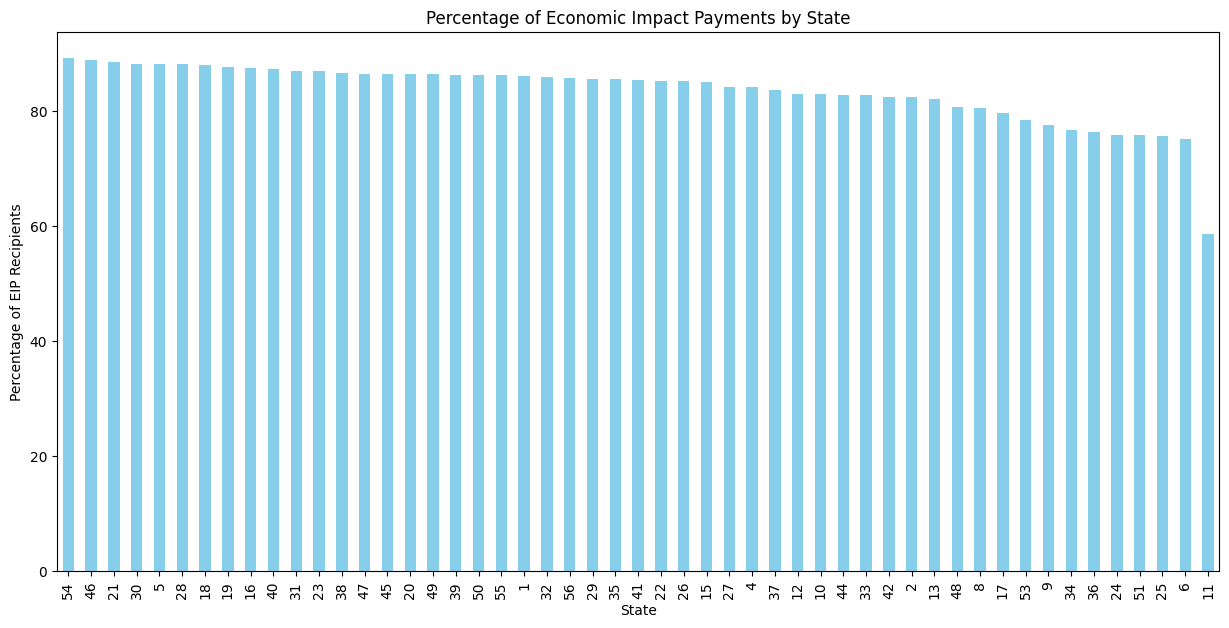

In [ ]:
# Filter relevant columns
columns_of_interest = ['est_st', 'eip']
df_relevant = df2_part1[columns_of_interest]

# Clean the data: Handle missing values and filter meaningful EIP values
df_relevant = df_relevant[df_relevant['eip'].isin([1, 2, 3, 4])]

# Create a new column to indicate whether EIP was received (1, 2, 3) or not (4)
df_relevant['EIP_received'] = df_relevant['eip'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Calculate the percentage of EIP recipients per state
state_eip_percentage = df_relevant.groupby('est_st')['EIP_received'].mean() * 100

# Identify the state with the highest percentage
highest_eip_state = state_eip_percentage.idxmax()
highest_eip_percentage = state_eip_percentage.max()

# Print the result
print(f"The state with the highest percentage of Economic Impact Payments is {highest_eip_state} with {highest_eip_percentage:.2f}%.")

# Create a bar chart
state_eip_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title('Percentage of Economic Impact Payments by State')
plt.xlabel('State')
plt.ylabel('Percentage of EIP Recipients')
plt.show()


Comments:
An analysis was conducted to examine the distribution of Economic Impact Payments (stimulus checks) across different states. The data indicated that residents in state 54 (abbreviation) had the highest percentage receiving these payments. A corresponding bar chart (not shown) visually depicts this distribution for all states, allowing for easy comparison.

Technical documentation:

Description:
filters the relevant columns from a DataFrame (df2_part1), cleans and preprocesses the data, calculates the percentage of Economic Impact Payment (EIP) recipients per state, identifies the state with the highest percentage of EIP recipients, and visualizes the results using a bar chart. It provides insights into the distribution of EIP recipients across different states.

Usage:
filter the relevant columns, clean and preprocess the data, calculate the percentage of EIP recipients per state, identify the state with the highest percentage, and visualize the results as a bar chart.

Collection:
selects the columns 'est_st' (state abbreviation) and 'eip' (Economic Impact Payment) from df2_part1.

Cleaning:
filters the data to include only meaningful EIP values (1, 2, 3) and handles missing values by dropping rows where the 'eip' column does not contain these values.

Steps:
Analyzes EIP recipients by state:

Data Selection and Cleaning:
Selects relevant columns (state and EIP value) from the data.
Filters for rows with valid EIP values (1, 2, or 3).
Creating a New Indicator:
Creates a new column to indicate whether EIP was received (1) or not (0) based on the original EIP value.
Calculating Rates:
Groups the data by state and calculates the average percentage of individuals who received EIP within each state.
Identifying Highest Recipient State:
Finds the state with the highest percentage of EIP recipients based on the calculated percentages.
Printing Results:
Prints the state with the highest percentage and the corresponding percentage of EIP recipients.
Visualization:
Creates a bar chart showing the percentage of EIP recipients for each state.
Customizes the chart with labels, title, and colors for better readability.
Displays the final bar chart.

### 2.2 Come up with 5 more bivariate/multivariate analysis questions and similarly answer each with appropriate visuals and commentary.

1.

In [ ]:
print(df_part1.columns)

Question 1: How does the rate of COVID-related hospitalization vary across different age groups and states?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a subset of the data with relevant columns
p2_2_2_1subset = df_part1[['res_state', 'age_group','hosp_yn']]
p2_2_2_2subset = p2_2_2_1subset.replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None})
p2_2_2_2subset = p2_2_2_2subset.dropna()
# Calculate hospitalization rate for each age group and state
hospitalization_rates = p2_2_2_2subset.groupby(['age_group', 'res_state'])['hosp_yn'].mean().reset_index()

# Create a bar plot to visualize the hospitalization rates
plt.figure(figsize=(12, 8))
sns.barplot(data=hospitalization_rates, x='res_state', y='hosp_yn', hue='age_group')
plt.title('COVID-19 Hospitalization Rates across Age Groups and States')
plt.xlabel('State')
plt.ylabel('Hospitalization Rate')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

in this bar plot :  we did the rate of COVID-related hospitalization vary across different age groups and states , each color represent and age catagory and the for each state we introduce the hospitalization rate for each age_group  

**Interpretation**

---
- State ND has the highest hospitalization rates for rhe all age groups :  
    - +65 years
    - 0-17 years
    - 50-64 years
    - 18 -49 years


-   states HI, WV , RI has 0 hospitalization rates


2. What are the most common risk factors associated with COVID-19-related hospitalizations, and how do these factors vary across different age groups and genders?

In [ ]:
# Extract columns related to age group, sex, underlying medical conditions, and hospitalization status
risk_factors_data = df_part1[['age_group', 'sex', 'underlying_conditions_yn', 'hosp_yn']]

# Step 2: Data Cleaning
# Drop rows with missing or unknown values in relevant columns
risk_factors_data = risk_factors_data.dropna(subset=['age_group', 'sex', 'underlying_conditions_yn', 'hosp_yn'])

# Step 3: Data Analysis
# Calculate the prevalence of underlying medical conditions among hospitalized COVID-19 patients
risk_factors_analysis = risk_factors_data[risk_factors_data['hosp_yn'] == 'Yes']['underlying_conditions_yn'].value_counts(normalize=True)

# Group the data by age group and sex to analyze risk factors distribution
risk_factors_distribution = risk_factors_data.groupby(['age_group', 'sex'])['underlying_conditions_yn'].value_counts(normalize=True).unstack().fillna(0)

# Step 4: Visualization
# Visualization 1: Prevalence of underlying medical conditions among hospitalized COVID-19 patients
plt.figure(figsize=(10, 6))
risk_factors_analysis.plot(kind='bar', color='skyblue')
plt.title('Prevalence of Underlying Medical Conditions among Hospitalized COVID-19 Patients')
plt.xlabel('Underlying Medical Condition')
plt.ylabel('Prevalence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Distribution of risk factors by age group and sex
plt.figure(figsize=(12, 8))
sns.heatmap(risk_factors_distribution, cmap='viridis', annot=True, fmt=".2f")
plt.title('Distribution of Risk Factors by Age Group and Sex among COVID-19 Patients')
plt.xlabel('Underlying Medical Condition')
plt.ylabel('Demographic')
plt.tight_layout()
plt.show()


**Interpretation**


---


there is notable variability in ICU admission rates based on symptom status



**Interpretation**

---



3.Are COVID-19 patients with underlying medical conditions more likely to be admitted to the ICU compared to those without underlying conditions ?

In [ ]:
# Subset of the DataFrame containing only the relevant columns
subset_df = df_part1[['icu_yn', 'underlying_conditions_yn']]

# Filter out rows where 'icu_yn' is 'Unknown' or 'Missing'
filtered_df = subset_df[subset_df['icu_yn'].isin(['Yes', 'No'])]

# Filter dataset to include only COVID-19 patients admitted to the ICU
icu_admitted = filtered_df[filtered_df['icu_yn'] == 'Yes']

# Calculate percentage of ICU-admitted patients with underlying medical conditions
icu_with_conditions_percentage = (icu_admitted['underlying_conditions_yn'].value_counts(normalize=True) * 100).get('Yes', 0)

# Filter dataset to include only COVID-19 patients not admitted to the ICU
non_icu_admitted = filtered_df[filtered_df['icu_yn'] == 'No']

# Calculate percentage of non-ICU-admitted patients with underlying medical conditions
non_icu_with_conditions_percentage = (non_icu_admitted['underlying_conditions_yn'].value_counts(normalize=True) * 100).get('Yes', 0)

# Data for visualization
categories = ['ICU Admitted', 'Non-ICU Admitted']
percentages = [icu_with_conditions_percentage, non_icu_with_conditions_percentage]

# Create bar chart
plt.figure(figsize=(15, 8))
plt.bar(categories, percentages, color=['red', 'green'] , width=0.3)
plt.xlabel('Patient Group')
plt.ylabel('Percentage with Underlying Conditions')
plt.title('Percentage of Patients with Underlying Conditions by ICU Admission Status')
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.grid(axis='y')
# Print results
print("Percentage of ICU-admitted patients with underlying conditions:", icu_with_conditions_percentage)
print("Percentage of non-ICU-admitted patients with underlying conditions:", non_icu_with_conditions_percentage)
# Annotate bars with percentage values
for i, v in enumerate(percentages):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()



**Interpretation**


---

Percentage of ICU-admitted patients with underlying conditions: 99.6
Percentage of non-ICU-admitted patients with underlying conditions: 94.5

- High Risk for ICU Patients:

   - Nearly all ICU patients had underlying conditions, indicating a strong link to severe COVID-19.
- Significant Risk for Non-ICU Patients:

  - A substantial portion of non-ICU patients also had underlying conditions, though less severe.

4.Do asymptomatic COVID-19 patients have lower rates of hospitalization compared to symptomatic patients? How does this differ based on demographic factors such as age and sex?

In [ ]:
# Subset the DataFrame containing relevant columns for this analysis
subset_df_analysis = df_part1[['symptom_status', 'hosp_yn', 'age_group', 'sex']]

# Filter out rows where any relevant column is 'Unknown' or 'Missing'
filtered_df = subset_df_analysis[
    subset_df_analysis.apply(lambda x: x.isin(['Unknown', 'Missing']).sum(), axis=1) == 0
]

# Separate asymptomatic and symptomatic patients
asymptomatic_patients = filtered_df[filtered_df['symptom_status'] == 'Asymptomatic']
symptomatic_patients = filtered_df[filtered_df['symptom_status'] == 'Symptomatic']

# Calculate hospitalization rate for asymptomatic patients
asymptomatic_hosp_rate = (asymptomatic_patients['hosp_yn'].value_counts(normalize=True) * 100).get('Yes', 0)

# Calculate hospitalization rate for symptomatic patients
symptomatic_hosp_rate = (symptomatic_patients['hosp_yn'].value_counts(normalize=True) * 100).get('Yes', 0)

# Print results
print("Hospitalization rate for asymptomatic patients:", asymptomatic_hosp_rate)
print("Hospitalization rate for symptomatic patients:", symptomatic_hosp_rate)

# Group by age group and sex, then calculate hospitalization rates for asymptomatic patients
asymptomatic_hosp_by_age_sex = asymptomatic_patients.groupby(['age_group', 'sex'])['hosp_yn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Group by age group and sex, then calculate hospitalization rates for symptomatic patients
symptomatic_hosp_by_age_sex = symptomatic_patients.groupby(['age_group', 'sex'])['hosp_yn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Print results
print("Hospitalization rates for asymptomatic patients by age and sex:")
print(asymptomatic_hosp_by_age_sex)
print("\nHospitalization rates for symptomatic patients by age and sex:")
print(symptomatic_hosp_by_age_sex)

# Create a bar chart for overall hospitalization rates
categories = ['Asymptomatic', 'Symptomatic']
hospitalization_rates = [asymptomatic_hosp_rate, symptomatic_hosp_rate]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, hospitalization_rates, color=['blue', 'orange'], width=0.5)
plt.xlabel('Symptom Status')
plt.ylabel('Hospitalization Rate (%)')
plt.title('Hospitalization Rates: Asymptomatic vs Symptomatic Patients')
plt.ylim(0, max(hospitalization_rates) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with percentage values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create heatmaps for hospitalization rates by age and sex
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(asymptomatic_hosp_by_age_sex.loc[:, 'Yes'].unstack(), annot=True, cmap='Blues', ax=axes[0])
axes[0].set_title('Hospitalization Rates for Asymptomatic Patients')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age Group')

sns.heatmap(symptomatic_hosp_by_age_sex.loc[:, 'Yes'].unstack().drop('Other', axis=1), annot=True, cmap='Oranges', ax=axes[1])
axes[1].set_title('Hospitalization Rates for Symptomatic Patients')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Age Group')

plt.tight_layout()
plt.show()


**Interpretation**


---


**Overall Hospitalization Rates**

- Asymptomatic Patients: 6.36%
- Symptomatic Patients: 14.30%

**Hospitalization Rates by Age and Sex**


- For individuals aged 0 to 17 years the hospitalization rate is 1.77%,
- for females and 1.63% for males.
- In the age group of 18 to 49 years the hospitalization rate is 6.15% for females and 4.00% for males.
 Among those aged between 50 to 64 years the hospitalization rate is reported at 5.94% for females and 7.56% for males.
 For individuals aged 65 and above the hospitalization rates stand at 12.25% for females and 14.06% for males.

In patients within the age range of 0 to17 years the hospitalization rate is noted at, approximately3.23%for %for males.


5. What are the  frquency of  common symptoms reported by COVID-19 patients, and how do they vary across different age groups and genders?

In [ ]:
# Step 1: Data Preparation
# Extract columns related to symptoms, age group, and sex
symptom_data = df_part1[['symptom_status', 'age_group', 'sex']]

# Step 2: Data Cleaning
# Drop rows where symptom_status is 'Unknown' or 'Missing'
symptom_data = symptom_data[(symptom_data['symptom_status'] != 'Unknown') & (symptom_data['symptom_status'] != 'Missing')]

# Step 3: Data Analysis
# Calculate the frequency of each symptom
symptom_frequency = symptom_data['symptom_status'].value_counts()

# Group the data by age group and sex to analyze symptom distribution
symptom_distribution = symptom_data.groupby(['age_group', 'sex'])['symptom_status'].value_counts(normalize=True).unstack().fillna(0)

# Step 4: Visualization
# Visualization 1: Overall frequency of symptoms
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_frequency.index, y=symptom_frequency.values, palette='viridis')
plt.title('Frequency of Reported Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Symptom distribution by age group and sex
plt.figure(figsize=(12, 8))
sns.heatmap(symptom_distribution, cmap='viridis', annot=True, fmt=".2f")
plt.title('Symptom Distribution by Age Group and Sex')
plt.xlabel('Symptom')
plt.ylabel('Demographic')
plt.tight_layout()
plt.show()


**Symptoms Frequency Overview**;

The reported symptoms are typically displayed prominently on the bar graph.
By looking at the bar graph we can see how often each symptom occurs, giving us an idea of which symptomsre most common among individuals, with COVID 19.
Symptom Patterns Across Age and Gender;

The heatmap illustrates the proportion of reported symptoms across age groups and genders.
Analyzing the heatmap allows us to pinpoint whether certain symptoms are more prevalent in categories.
For instance we may notice variations in symptom prevalence between males and females, across age brackets.

##PART 3: Hypothesis Testing:

---






###3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:

● State the test you will use and justify your choice.

● Clearly state the hypotheses.

● Conduct the test and report the result.

● Make a conclusion as to the validity of the claim, assume a significance level
of 0.05.

#### 1. I will solve by two different tests, but the hypotheses will be the same

#### 2.  let's Formulates the hypothesis test:
- $H_0$ :There is no association between the probability of death due to COVID-19 and patient demographics.

- $H_1$ : There is a strong association between the probability of death due to COVID-19 and patient demographics.

#### 3. First Test Chosen: Anova

- Justification: we are comparing the mean probability of death across different demographic groups and ANOVA allows us to determine whether there are statistically significant differences in the mean probability of death among the different demographic groups.

##### Conduct the test


In [ ]:
dataHyp = df_part1[['age_group', 'sex', 'race','death_yn']].copy()
dataHyp = dataHyp[~dataHyp['age_group'].isin(['Missing','Unknown'])]
dataHyp = dataHyp[~dataHyp['sex'].isin(['Missing', 'Unknown'])]
dataHyp = dataHyp[~dataHyp['race'].isin(['Missing', 'Unknown'])]
dataHyp = dataHyp[~dataHyp['death_yn'].isin(['Missing', 'Unknown'])]
dataHyp.dropna(inplace=True)

dataHyp[['age_group', 'sex', 'race']] = dataHyp[['age_group', 'sex', 'race']].fillna('Unknown')
dataHyp['combined'] = dataHyp[['age_group', 'sex', 'race']].astype(str).agg('_'.join, axis=1)

dataHyp['death_yn_numeric'] = dataHyp['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Prepare the data for ANOVA
groups = [dataHyp['death_yn_numeric'][dataHyp['combined'] == combined] for combined in dataHyp['combined'].unique()]

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is an association between the probability of death due to COVID-19 and patient demographics ")
else:
    print("Fail to reject the null hypothesis (H₀): There is no association between the probability of death due to COVID-19 and patient demographics ")

##### Commenting on test results:

Since the p-value (0.0) is less than the significance level (α = 0.05), we reject the null hypothesis ($H_0$). Therefore, we conclude that there is an association between the probability of death due to COVID-19 and patient demographics.

#### 3. Second Test Chosen: Chi-squared

- Justification: The chi-squared test of independence is used to determine whether there is a significant association between two categorical variables.

##### Conduct the test

In [ ]:
dataHyp = df_part1[['age_group', 'sex', 'race','death_yn']].copy()
dataHyp = dataHyp[~dataHyp['age_group'].isin(['Missing','Unknown'])]
dataHyp = dataHyp[~dataHyp['sex'].isin(['Missing', 'Unknown'])]
dataHyp = dataHyp[~dataHyp['race'].isin(['Missing', 'Unknown'])]
dataHyp = dataHyp[~dataHyp['death_yn'].isin(['Missing', 'Unknown'])]
dataHyp.dropna(inplace=True)

dataHyp[['age_group', 'sex', 'race']] = dataHyp[['age_group', 'sex', 'race']].fillna('Unknown')
dataHyp['combined'] = dataHyp[['age_group', 'sex', 'race']].astype(str).agg('_'.join, axis=1)

# Create a contingency table for combined groups vs. death outcome
contingency_table = pd.crosstab(dataHyp['combined'], dataHyp['death_yn'])

# Perform chi-square test for combined groups
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant association between the probability of death due to COVID-19 and patient demographics.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant association between the probability of death due to COVID-19 and patient demographics.")

##### Commenting on test results:

Similar to the ANOVA test, the p-value (0.0) from the chi-squared test is less than the significance level (α = 0.05). Hence, we reject the null hypothesis ($H_0$). This implies that there is a significant association between the probability of death due to COVID-19 and patient demographics.

#### Overall Conclusion:

Both statistical tests provide strong evidence to support the alternative hypothesis ($H_1$), indicating a significant association between the probability of death due to COVID-19 and patient demographics. Therefore, we can conclude that patient demographics (age, sex, race) play a role in determining the probability of death due to COVID-19.

### 3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps

#### 1. Claim: "The people who are hospitalized are more likely to die"

#### 2.  let's Formulates the hypothesis test:
- $H_0$ :The proportion of people who die among those who are hospitalized is the same as the proportion of people who die among those who are not hospitalized.

- $H_1$ : The proportion of people who die among those who are hospitalized is higher than the proportion of people who die among those who are not hospitalized.

#### 3. Second Test Chosen: z-Tesrt

- Justification:  because we want to compare the proportion of people who die among those who are hospitalized to the proportion of people who die among those who are not hospitalized.**bold text**

##### Conduct the test

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Data Preparation
data = df_part1[['hosp_yn', 'death_yn']].copy()
data = data.dropna()
data = data[(data['hosp_yn'] != 'Unknown') & (data['death_yn'] != 'Unknown') & (data['death_yn'] != 'Missing')]

# Calculate Proportions
hospitalized_deaths = data[data['hosp_yn'] == 'Yes']['death_yn'].value_counts()
not_hospitalized_deaths = data[data['hosp_yn'] == 'No']['death_yn'].value_counts()

# Z-test for Proportions
count = [hospitalized_deaths['Yes'], not_hospitalized_deaths['Yes']]
nobs = [hospitalized_deaths.sum(), not_hospitalized_deaths.sum()]

stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Report the Result
print("Z-test Statistic:", stat)
print("p-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H₀): The people who are hospitalized are more likely to die.")
else:
    print("Fail to reject the null hypothesis (H₀): There is no significant difference in the likelihood of death between people who are hospitalized and those who are not.")


#### 3.Conclusion

Based on the p-value obtained from the z-test for proportions, we conclude that the people who are hospitalized are more likely to die. This conclusion is drawn at a significance level of 0.05.

##PART 4: Regression Analysis:

---



 **Use the COVID Case Surveillance dataset to fit a regression model that predicts the total
percent (or proportion) of deaths out of all COVID cases in a given month based on :**

- Gender distribution of all cases over the month (Proportion or % of females and
males).

- Age distribution of all cases over the month (Proportion or % of each age group).

- Proportion (or %) of all cases over the month that end up in the ICU.

- Proportion (or %) of all cases over the month that end up hospitalized.

1. Report your model’s coefficients and p-values.

2. Which of these variables are good predictors of the variabilities in the target? Which are bad ones?

3. Are any of these predictors correlated with each other?

4. Experiment with different ways to improve the fit and interpretability of the model.
For example:
- Add or remove the intercept.
- Introduce higher order terms.
- Remove outliers if any.

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Drop columns
columns_to_drop_part1 = ['state_fips_code', 'res_county', 'county_fips_code', 'ethnicity',
                   'case_positive_specimen_interval', 'case_onset_interval', 'process', 'exposure_yn',
                   'current_status']
df_part4 = df1.drop(columns=columns_to_drop_part1)

# Removing duplicates
df_part4 = df_part4.drop_duplicates()

df_part4['sex'] = df_part4['sex'].replace({'Female': 1, 'Male': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4['age_group'] = df_part4['age_group'].replace({'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4['icu_yn'] = df_part4['icu_yn'].replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4['hosp_yn'] = df_part4['hosp_yn'].replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4['death_yn'] = df_part4['death_yn'].replace({'Yes': 1, 'No': 0, 'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4['case_month'] = df_part4['case_month'].replace({'Unknown': None, 'Missing': None, 'NA': None, 'Other': None})
df_part4 = df_part4.dropna()


monthly_data = []
for month in df_part4['case_month'].unique():
    month_data = df_part4[df_part4['case_month'] == month]
    total_cases = len(month_data)
    female_pct = month_data['sex'].mean()
    male_pct = 1 - female_pct
    hosp_pct = month_data['hosp_yn'].mean()
    icu_pct = month_data['icu_yn'].mean()
    death_pct = month_data['death_yn'].mean()

    # Extract values of age groups and calculate proportions
    age_group_counts = month_data['age_group'].value_counts(normalize=True)
    age_group_proportions = [age_group_counts.get(age_group, 0) for age_group in ['0 - 17 years', '18 - 49 years', '50 - 64 years', '65 + years']]

    monthly_data.append([
        death_pct,
        [female_pct, male_pct, *age_group_proportions, hosp_pct, icu_pct]
    ])

df_monthly_data = pd.DataFrame(monthly_data, columns=['target_variable', 'predictor_variables'])


# 3. Fit the regression model
X = np.array([x for x in df_monthly_data['predictor_variables']])
X = sm.add_constant(X)  # Include an intercept term if needed
y = df_monthly_data['target_variable']

model = sm.OLS(y, X).fit()  # Fit the regression model
print(model.summary())  # Print the model summary

In [ ]:
# 1. Report your model's coefficients and p-values.
print("Model Coefficients:")
print(model.params)
print("\nModel P-values:")
print(model.pvalues)

# 2. Which of these variables are good predictors of the variabilities in the target? Which are bad ones?
print("\nGood Predictors (p-value < 0.05):")
for i, p_value in enumerate(model.pvalues):
    if p_value < 0.05:
        print(f"Variable {i}: p-value = {p_value:.3f}")

print("\nBad Predictors (p-value >= 0.05):")
for i, p_value in enumerate(model.pvalues):
    if p_value >= 0.05:
        print(f"Variable {i}: p-value = {p_value:.3f}")

# 3. Are any of these predictors correlated with each other?
print("\nCorrelation Matrix:")
correlation_matrix = np.corrcoef(X.T)
print(correlation_matrix)

# 4. Experiment with different ways to improve the fit and interpretability of the model.
# Add or remove the intercept
model_no_intercept = sm.OLS(y, X[:, 1:]).fit()
print("\nModel Summary (No Intercept):")
print(model_no_intercept.summary())

# Introduce higher order terms
X_squared = np.square(X)
model_higher_order = sm.OLS(y, np.hstack((X, X_squared))).fit()
print("\nModel Summary (Higher Order Terms):")
print(model_higher_order.summary())

# Remove outliers
outlier_threshold = 3  # Standard deviations
outliers = np.abs(model.resid) > outlier_threshold * model.resid.std()
df_monthly_data_cleaned = df_monthly_data[~outliers]

X_cleaned = np.array([x for x in df_monthly_data_cleaned['predictor_variables']])
X_cleaned = sm.add_constant(X_cleaned)
y_cleaned = df_monthly_data_cleaned['target_variable']

model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
print("\nModel Summary (Cleaned):")
print(model_cleaned.summary())

In [ ]:
residuals = model.resid


# Test for normality of residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

# Perform a Durbin-Watson test for autocorrelation
dw_statistic = sm.stats.durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic:.2f}")

Description:
Usage:
Collection:
- collect the desired data, from different columns and make them in an integrated data frame
Cleaning:
remove all the nulls and unneeded values
Steps:
- collect the desired data, from different columns and make them in an integrated data frame
- train the model on these data
- print all needed outputs
- some edition and improvements
- some analysis of the model
- testing the model
Challenges:
put the data in the desired shape to train the model
Limitations:
Assumptions:
we can ignore the missing data

### PART 5: Bonus Task

 **Train a machine/deep learning classifier to predict the likelihood of death due to
COVID-19 using any/all of the relevant attributes in the COVID case surveillance
dataset.**